## Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [3]:
df = pd.read_csv('Advertising.csv')

## Separate into Features & Labels

In [4]:
X = df.drop('sales', axis=1)
y = df['sales']

## Train | Test | Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
## Train | Validation | Hold Out
## 70% | 15% | 15% == 100%
## 1st split - 70/30
## 2nd split - 50/50 (its operating on the 30 percent from above where 15% will go to validation and the other will go to hold out)
## Make sure to not use X_test or y_test bc its broken down further
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
## Second Split
X_validation, X_holdout, y_validation, y_holdout = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [8]:
len(X)

200

In [9]:
len(X_train)

140

In [10]:
len(X_validation)

30

In [11]:
len(X_holdout)

30

## Model Training

In [12]:
from sklearn.ensemble import RandomForestRegressor
## make sure to put random_state
model = RandomForestRegressor(n_estimators=3,random_state=101)

In [13]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=3, random_state=101)

## Performance Metrics

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
validation_pred = model.predict(X_validation)

In [16]:
mean_absolute_error(y_validation,validation_pred)

0.853333333333333

In [17]:
np.sqrt(mean_squared_error(y_validation,validation_pred))

1.1031268688998959

In [18]:
## Compare mean absolute error to mean
## compare root mean squared error to std
df.describe()['sales']

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

## Elbow Plot (not satisfied with current performance metrics)
- want lower root mean squared error and mean abs error

In [19]:
root_mean_squared_error = []
mean_abs_error = []
for n in range(1,40):
    model = RandomForestRegressor(n_estimators=n, random_state=101)
    model.fit(X_train, y_train)
    validation_pred = model.predict(X_validation)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_validation,validation_pred)))
    mean_abs_error.append(mean_absolute_error(y_validation,validation_pred))

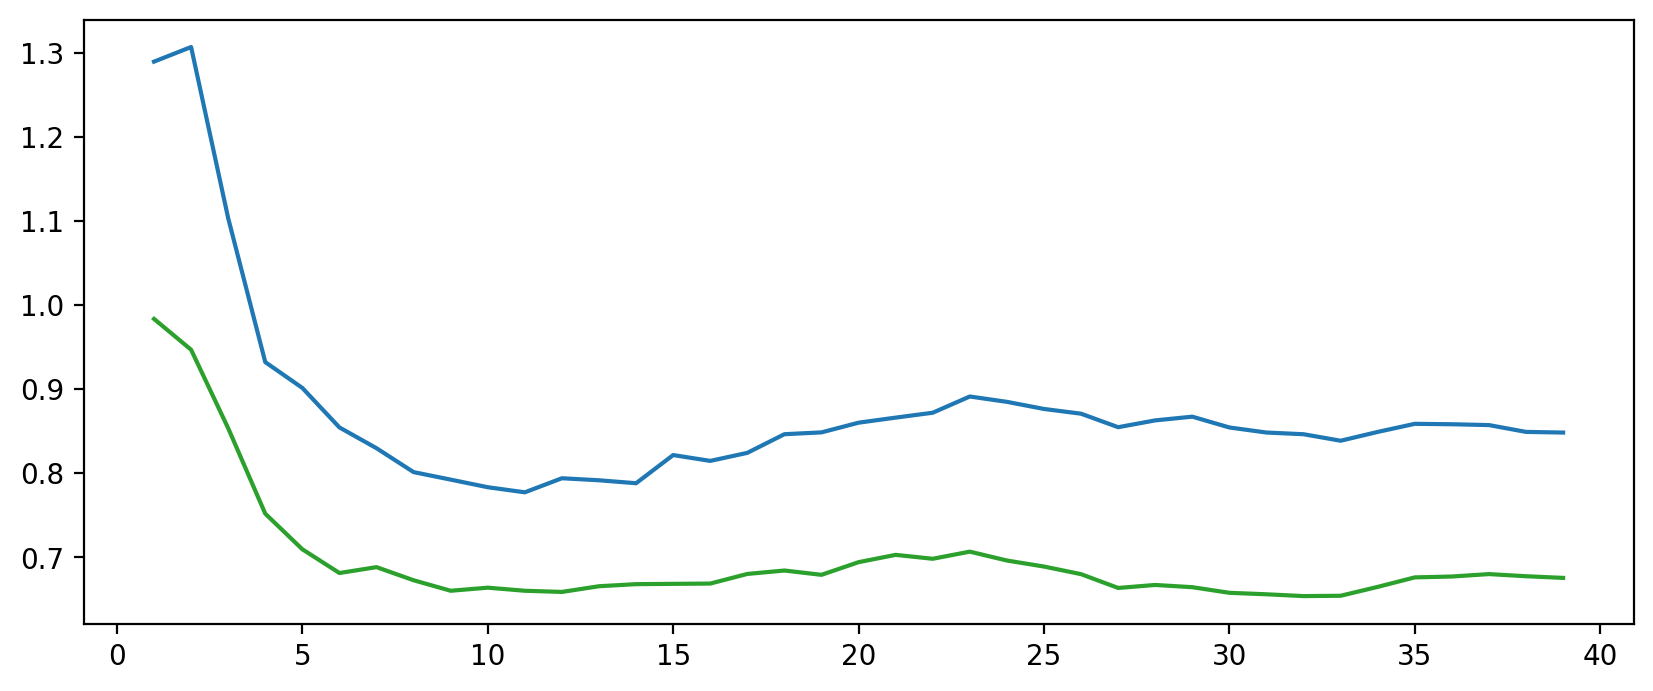

In [20]:
plt.figure(figsize=(10,4), dpi=200)
plt.plot(range(1,40), root_mean_squared_error, color='tab:blue')
plt.plot(range(1,40), mean_abs_error, color='tab:green')

## New Model

In [21]:
new_model = RandomForestRegressor(n_estimators=10,random_state=101)
new_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

## Performance Metrics

In [22]:
validation_pred = model.predict(X_validation)
mean_absolute_error(y_validation,validation_pred)

0.6752991452991458

In [23]:
np.sqrt(mean_squared_error(y_validation,validation_pred))

0.848159885728986

## Final Performance Metrics (Hold-Out Set)

In [24]:
holdout_pred = new_model.predict(X_holdout)

In [25]:
## MAE
mean_absolute_error(y_holdout,holdout_pred)

0.5843333333333331

In [26]:
RMSE
np.sqrt(mean_squared_error(y_holdout,holdout_pred))

0.722802416524276

## Final Model

In [27]:
final_model = RandomForestRegressor(n_estimators=10, random_state=101)

In [28]:
final_model.fit(X,y)

RandomForestRegressor(n_estimators=10, random_state=101)

## Save Model

In [29]:
import joblib

In [31]:
## saving a pkl file
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [32]:
## Saving col names as pkl file
joblib.dump(list(X.columns),'col_names.pkl')

['col_names.pkl']

## Loading in Our Model

In [33]:
new_columns = joblib.load('col_names.pkl')
new_columns

['TV', 'radio', 'newspaper']

In [36]:
loaded_model = joblib.load('final_model.pkl')

In [38]:
## Try to predict sales given these values
loaded_model.predict([[249,22,69]])

array([17.35])